In [6]:
# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [7]:
dt = 0.0001
n = 3
m = [1,1,1]
t_end = 100

In [8]:
q = t_end/dt
r = np.zeros((n,3))
v = np.zeros((n,3))
a = np.zeros((n,3))
jk = np.zeros((n,3))
old_r = np.zeros((n,3))
old_v = np.zeros((n,3))
old_a = np.zeros((n,3))
old_jk = np.zeros((n,3))
rji = np.zeros((3))
vji = np.zeros((3))
da = np.zeros((3))
dj = np.zeros((3))
e_in = np.zeros((2))
ekin = 0
epot = 0
coll_time_sq = 1e300

result = np.zeros((int(q),n,3))

In [9]:
r[0,:] = (0.9700436,-0.24308753,0)
r[1,:] = (-0.9700436,0.24308753,0)
r[2,:] = (0,0,0)
v[0,:] = (0.466203685,0.43236573,0)
v[1,:] = (0.466203685,0.43236573,0)
v[2,:] = (-2*v[0,0],-2*v[0,1],0)
v[0][0] += 0.0001 #instability

In [10]:
for i in range (0,n):
    for j in range (i+1,n):
        for k in range (0,3):
            rji[k] = r[j,k] - r[i,k]
            vji[k] = v[j,k] - v[i,k]
        r2 = 0
        v2 = 0
        for k in range(0,3):
            r2 += rji[k]**2
            v2 += vji[k]**2
            
        coll_est_sq = r2/v2
        if (coll_time_sq > coll_est_sq):
            coll_time_sq = coll_est_sq
        
        r3 = r2 * np.sqrt(r2)
        rv = 0
        for k in range(0,3):
            rv += rji[k]*vji[k]
        rv /= r2 
        for k in range(0,3):
            a[i,k] += m[j]*rji[k]/r3
            a[j,k] -= m[i]*rji[k]/r3
            jk[i,k] += m[j] * (vji[k] - 3*rv*rji[k])/r3
            jk[j,k] -= m[i] * (vji[k] - 3*rv*rji[k])/r3

In [11]:
for i in range (0,n):
    for j in range (i+1,n):
        for k in range (0,3):
            rji[k] = r[j,k] - r[i,k]
        r2 = 0
        for k in range (0,3):
            r2 += rji[k]*rji[k]
        epot -= m[i]*m[i]/np.sqrt(r2)
    
    for k in range (0,3):
        ekin += 0.5*m[i]*v[i,k]*v[i,k]
        
e_in[0] = ekin + epot

In [17]:
for t in range (0,int(q)):
    result[t,] = r
    for i in range (0,n):
        for k in range (0,3):
            old_r[i,k] = r[i,k]
            old_v[i,k] = v[i,k]
            old_a[i,k] = a[i,k]
            old_jk[i,k] = jk[i,k]
            r[i,k] += v[i,k]*dt + (a[i,k]*dt*dt)/2 + (jk[i][k]*dt*dt*dt)/6
            v[i,k] += a[i,k]*dt + (jk[i,k]*dt*dt)/2
            
    for i in range (0,n):
        for k in range (0,3):
            a[i,k] = jk[i,k] = 0
            
    for i in range (0,n):
        for j in range (i+1,n):
            for k in range (0,3):
                rji[k] = r[j,k] - r[i,k]
                vji[k] = v[j,k] - v[i,k]
            r2 = 0
            v2 = 0
            for k in range (0,3):
                r2 += rji[k]**2
                v2 += vji[k]**2
                
            coll_est_sq = r2**2/v2**2
            if (coll_time_sq > coll_est_sq):
                coll_time_sq = coll_est_sq
                
            r3 = r2*np.sqrt(r2)
            rv = 0
            for k in range (0,3):
                rv += rji[k]*vji[k]
            rv /= r2
            for k in range (0,3):
                a[i,k] += m[j]*rji[k]/r3
                a[j,k] -= m[i]*rji[k]/r3
                jk[i,k] += m[j] * (vji[k] - 3*rv*rji[k])/r3
                jk[j,k] -= m[i] * (vji[k] - 3*rv*rji[k])/r3
    
    for i in range (0,n):
        for k in range (0,3):
            v[i,k] = old_v[i,k] + (old_a[i,k] + a[i,k])*dt/2 + (old_jk[i,k] - jk[i,k])*dt**2/12
            r[i,k] = old_r[i,k] + (old_v[i,k] + v[i,k])*dt/2 + (old_a[i,k] - a[i,k])*dt**2/12
    
    dt = dt_param * coll_time

In [18]:
ekin = 0
epot = 0

for i in range (0,n):
    for j in range (i+1,n):
        for k in range (0,3):
            rji[k] = r[j,k] - r[i,k]
        r2 = 0
        for k in range (0,3):
            r2 += rji[k]*rji[k]
        epot -= m[0]*m[0]/np.sqrt(r2)  
        
    for k in range (0,3):
        ekin += 0.5*m[0]*v[i,k]*v[i,k]

e_in[1] = ekin + epot

In [12]:
print("Initial total energy E_in                     = {}".format(e_in[0]))
print("Final total energy E_out                      = {}".format(e_in[1]))
print("absolute energy error: E_out - E_in           = {}".format(e_in[1]-e_in[0]))
print("relative energy error: (E_out - E_in) / E_in  = {}".format(((e_in[1]-e_in[0])/e_in[0])))

Initial total energy E_in                     = -1.2870002124790318
Final total energy E_out                      = 0.0
absolute energy error: E_out - E_in           = 1.2870002124790318
relative energy error: (E_out - E_in) / E_in  = -1.0


<IPython.core.display.Javascript object>


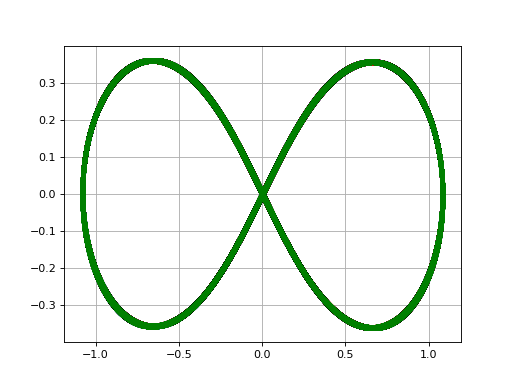

In [19]:
fig, ax1 = plt.subplots()
ax1.plot(result[:,0,0],result[:,0,1], '.b')
ax1.plot(result[:,1,0],result[:,1,1], '.r')
ax1.plot(result[:,2,0],result[:,2,1], '.g')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.xlim(-10,10)
# plt.ylim(-10,10)
plt.grid(True)
# plt.savefig('contour_sobol.png')
# plt.title('Sobol sequence')
plt.draw()